In [3]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import keras
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.


In [9]:
keras.__version__

'2.3.1'

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [10]:
ls

sample_data/


In [16]:
cd gdrive 

/content/gdrive


In [11]:
ls

sample_data/


In [17]:
cd My\ Drive

/content/gdrive/My Drive


In [9]:
ls | grep HateSpeech

HateSpeechData/


In [18]:
cd HateSpeechData/

/content/gdrive/My Drive/HateSpeechData


In [14]:
ls

sample_data/


In [19]:
train = pd.read_csv('train.csv')

In [13]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [20]:
test = pd.read_csv('test.csv')

In [16]:
train.isnull().any(),test.isnull().any()

(id               False
 comment_text     False
 toxic            False
 severe_toxic     False
 obscene          False
 threat           False
 insult           False
 identity_hate    False
 dtype: bool, id              False
 comment_text    False
 dtype: bool)

In [17]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values
list_sentences_train = train["comment_text"]
list_sentences_test = test["comment_text"]

In [18]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [19]:
list_tokenized_train[:1]

[[688,
  75,
  1,
  126,
  130,
  177,
  29,
  672,
  4511,
  12052,
  1116,
  86,
  331,
  51,
  2278,
  11448,
  50,
  6864,
  15,
  60,
  2756,
  148,
  7,
  2937,
  34,
  117,
  1221,
  15190,
  2825,
  4,
  45,
  59,
  244,
  1,
  365,
  31,
  1,
  38,
  27,
  143,
  73,
  3462,
  89,
  3085,
  4583,
  2273,
  985]]

In [20]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [21]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

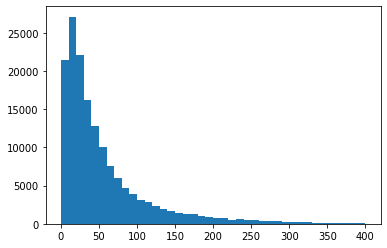

In [22]:
plt.hist(totalNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.show()

In [23]:
inp = Input(shape=(maxlen, ))

In [24]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [25]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)

In [26]:
x = GlobalMaxPool1D()(x)

In [27]:
x = Dropout(0.1)(x)

In [28]:
x = Dense(50, activation="relu")(x)

In [29]:
x = Dropout(0.1)(x)

In [30]:
x = Dense(6, activation="sigmoid")(x)

In [31]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [32]:
batch_size = 32
epochs = 5
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 143613 samples, validate on 15958 samples
Epoch 1/5
143613/143613 [==============================] - 1447s 10ms/step - loss: 0.0696 - accuracy: 0.9776 - val_loss: 0.0513 - val_accuracy: 0.9810
Epoch 2/5
143613/143613 [==============================] - 1433s 10ms/step - loss: 0.0452 - accuracy: 0.9831 - val_loss: 0.0464 - val_accuracy: 0.9826
Epoch 3/5
143613/143613 [==============================] - 1511s 11ms/step - loss: 0.0395 - accuracy: 0.9847 - val_loss: 0.0483 - val_accuracy: 0.9821
Epoch 4/5
143613/143613 [==============================] - 1547s 11ms/step - loss: 0.0347 - accuracy: 0.9863 - val_loss: 0.0480 - val_accuracy: 0.9827
Epoch 5/5
143613/143613 [==============================] - 1540s 11ms/step - loss: 0.0307 - accuracy: 0.9876 - val_loss: 0.0524 - val_accuracy: 0.9820


In [34]:
pwd

'/content/gdrive/My Drive/HateSpeechData'

In [35]:
#model.save("/content/gdrive/My Drive/HateSpeechData/hatespeechModel.h5")

In [23]:
model =  keras.models.load_model("/content/gdrive/My Drive/HateSpeechData/hatespeechModel.h5", compile = True) 

twt = ['Meetings: Because none of us is as dumb as all of us.']
#vectorizing the tweet by the pre-fitted tokenizer instance

tokenizer = Tokenizer()
tokenizer.fit_on_texts(twt)
twt = tokenizer.texts_to_sequences(twt)

#twt = Tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 5 6 1 2 7 3 8 3 9 1 2]]


In [25]:
maxlen = 200
twt = pad_sequences(twt, maxlen=maxlen)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]

In [26]:
sentiment

array([0.4420865 , 0.0048354 , 0.07565447, 0.00518873, 0.07887929,
       0.0158194 ], dtype=float32)

In [33]:
#twt = ["Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time"]
twt = ["Thank you for understanding. I think very highly of you and would not revert without discussion."]
#vectorizing the tweet by the pre-fitted tokenizer instance

tokenizer = Tokenizer()
tokenizer.fit_on_texts(twt)
twt = tokenizer.texts_to_sequences(twt)

#twt = Tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  2  1  3  4  5  6  7  8  9  1 10 11
  12 13 14 15]]


In [34]:
maxlen = 200
twt = pad_sequences(twt, maxlen=maxlen)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]

In [35]:
sentiment

array([0.24496314, 0.00231327, 0.03331903, 0.00472293, 0.0282904 ,
       0.0068447 ], dtype=float32)